In [36]:
import pandas as pd
import numpy as np

import pandas as pd

# Load the Excel file
file_path = r'D:\HI448116_Santosh_Karpe\FY25\DOCS\III\Ass\ASA - SK\heart_disease.xlsx'  # Replace with the path to your .xlsx file
df = pd.read_excel(file_path, sheet_name = 'Heart_disease')

# Inspect the first few rows
print(df.head())

# Check for missing values and data types
print(df.info())

# Check for basic statistics
print(df.describe())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-n

In [ ]:
# Exploratory Data Analysis (EDA):
# Performing EDA is crucial for understanding the structure of the data and identifying any issues, such as missing values or outliers.
# Missing Values:

In [37]:
# Check for missing values
print(df.isnull().sum())

# You can decide to fill or drop rows/columns with missing values
df = df.dropna()  # or df.fillna(method='ffill') for forward fill

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [ ]:
#Outliers and Distributions:

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


<Axes: >

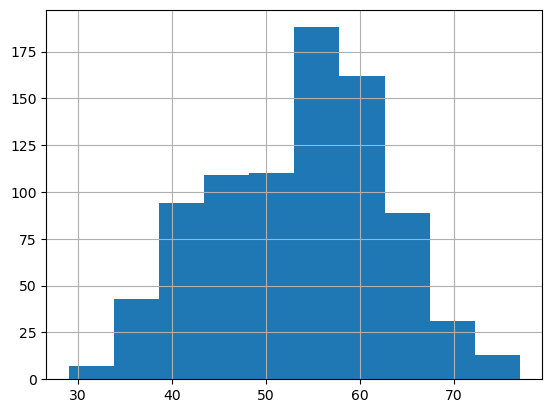

In [38]:
import pandas as pd

# Assuming df is your DataFrame
# Step 1: Check the data type of the column
print(df.dtypes)

# Step 2: Convert the column to numeric or datetime if needed
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # for numeric data

# or if it's a date column
# df['column_name'] = pd.to_datetime(df['column_name'], errors='coerce')  # for date data
print(df.columns)
# Step 3: Plot the histogram again
df['age'].hist()

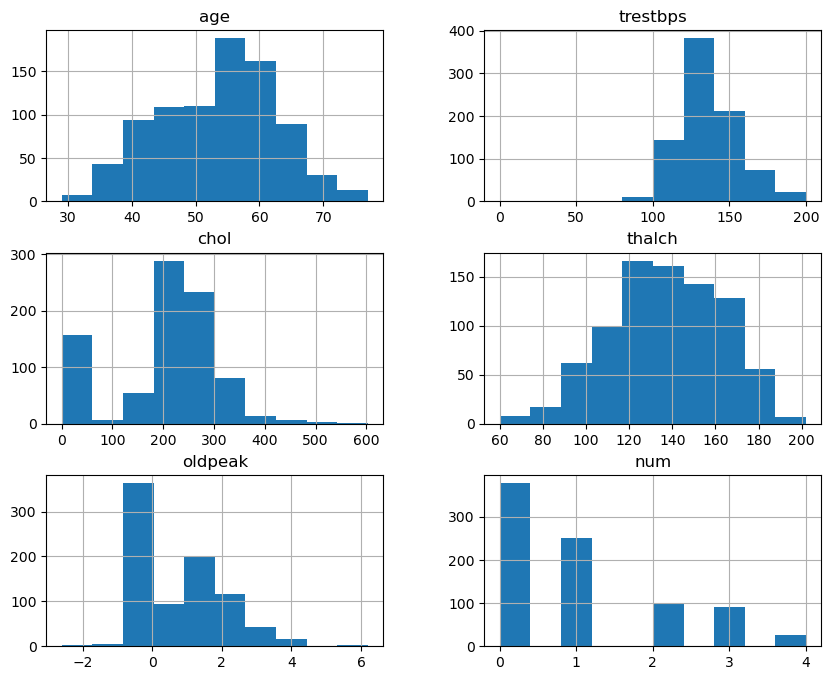

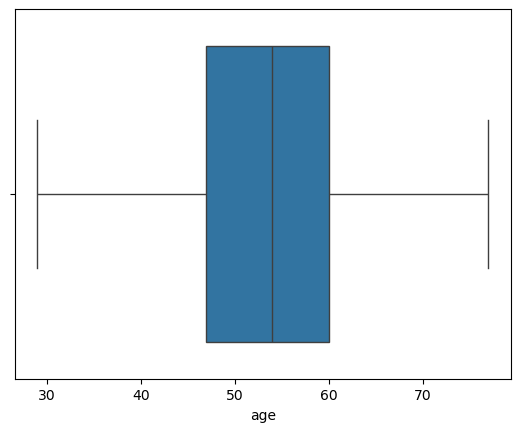

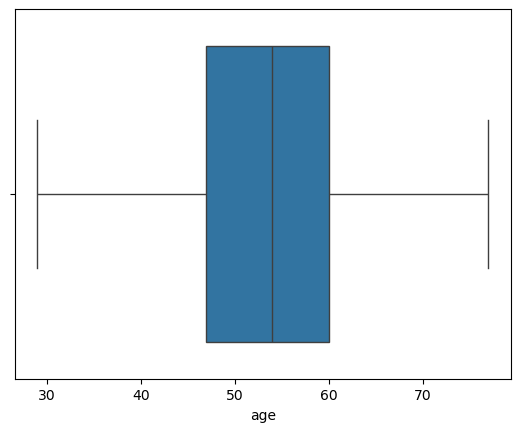

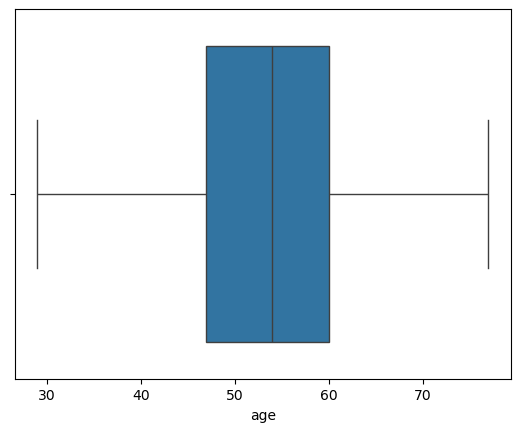

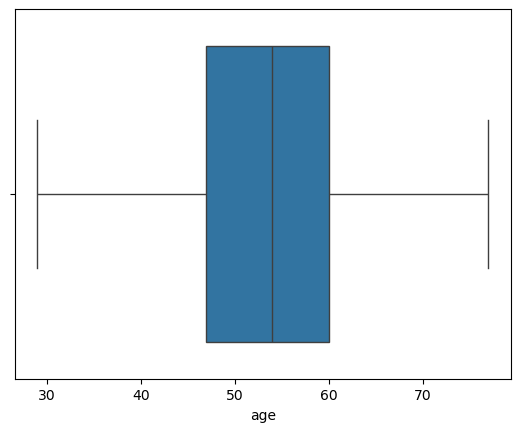

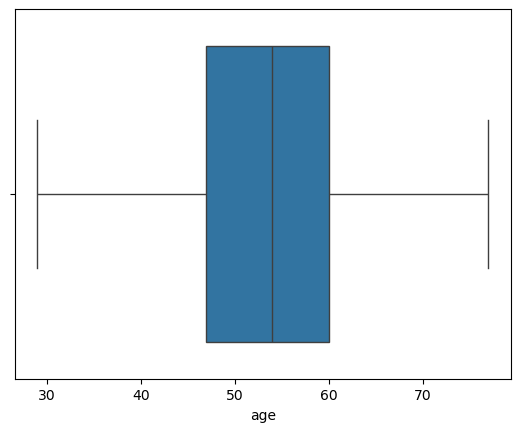

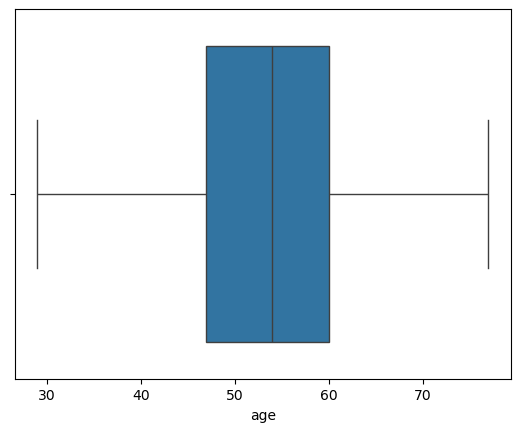

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for all features
df.hist(figsize=(10, 8))
plt.show()

# Boxplots to check for outliers
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=df['age'])
    plt.show()

In [ ]:
#Correlation Matrix:

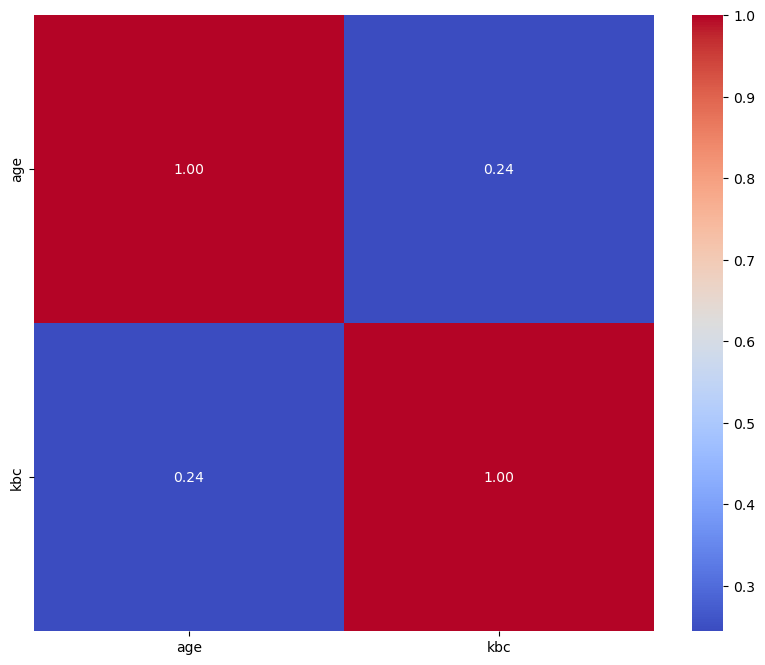

In [53]:
# Plot the correlation matrix
sd = pd.DataFrame()
sd['age'] = df['age']
sd['kbc']=df['trestbps']
plt.figure(figsize=(10, 8))
sns.heatmap(sd.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
#Feature Engineering:
#Feature engineering involves preparing the data for modeling by handling categorical variables, scaling numerical features, and handling missing values.
#Encoding Categorical Variables:

In [55]:
from sklearn.preprocessing import LabelEncoder

# Example: If you have categorical columns, use label encoding
label_encoder = LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])

In [ ]:
#Scaling Numerical Features (if needed):

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['age', 'trestbps']])
df[['age', 'trestbps']] = scaled_features

In [ ]:
#Decision Tree Classification:
#Now that your data is prepared, you can split the dataset into training and testing sets and build a Decision Tree model.
#Splitting the Data:

In [63]:
from sklearn.model_selection import train_test_split

X = df.drop('sex', axis=1)  # Features
y = df['chol']  # Target variable

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train the Decision Tree Model:

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


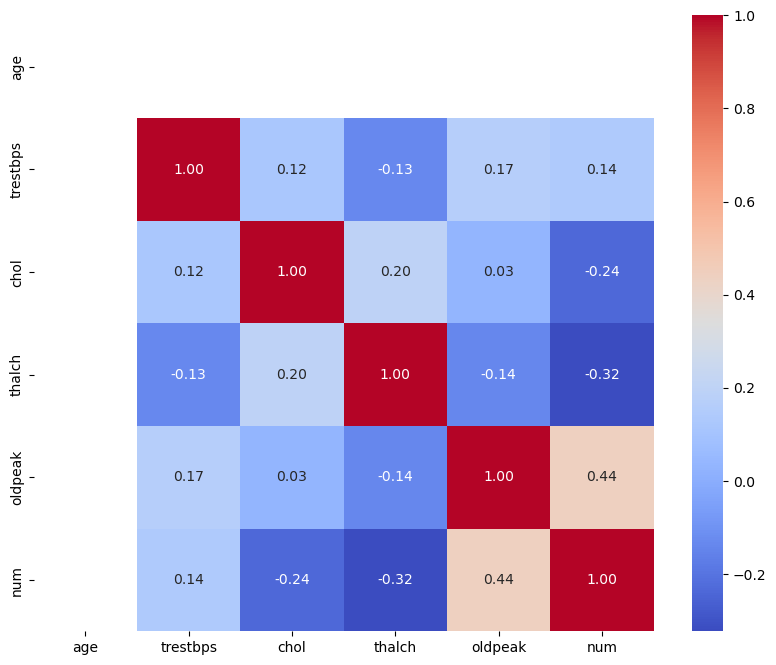

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r'D:\HI448116_Santosh_Karpe\FY25\DOCS\III\Ass\ASA - SK\heart_disease.xlsx'  # Replace with the path to your .xlsx file
df = pd.read_excel(file_path, sheet_name = 'Heart_disease')

# Inspect the columns and data types
print(df.dtypes)

# Convert categorical variables (e.g., chest pain types) to numeric values
df['age'] = df['age'].map({
    'non-anginal': 0,
    'anginal': 1,
    'asymptomatic': 2,
    'typical angina': 3
})

# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()